In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd

# Load the iris dataset
iris = load_iris(as_frame=True)
print(iris.keys())  # Show the keys


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [2]:
# Convert to DataFrame
df = iris.frame.copy()

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# Drop the target column
df = df.drop(columns=['target'])

from sklearn.preprocessing import StandardScaler
# Optional: Scale the features for better K-Means performance
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
print(scaled_features[:5])

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


In [5]:
# Apply K-Means with n=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(scaled_features)
(df.head())

C:\Users\adity\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


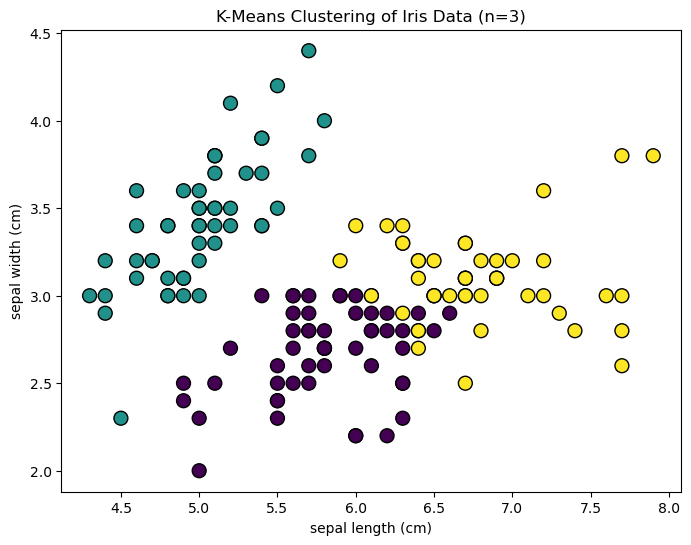

In [6]:
# Visualize clusters
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['cluster'], cmap='viridis', edgecolor='k', s=100)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('K-Means Clustering of Iris Data (n=3)')
plt.show()

In [7]:
# Get user input
print("Enter the flower measurements:")
sepal_length = float(input("Sepal length (cm): "))
sepal_width = float(input("Sepal width (cm): "))
petal_length = float(input("Petal length (cm): "))
petal_width = float(input("Petal width (cm): "))

# Prepare input for prediction
user_data = [[sepal_length, sepal_width, petal_length, petal_width]]

# Scale user input the same way as training data
user_data_scaled = scaler.transform(user_data)

# Predict cluster
cluster = kmeans.predict(user_data_scaled)[0]

print(f"The predicted cluster for the given flower is: {cluster}")

Enter the flower measurements:


Sepal length (cm):  5.8
Sepal width (cm):  4
Petal length (cm):  1.2
Petal width (cm):  0.2


The predicted cluster for the given flower is: 1


C:\Users\adity\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


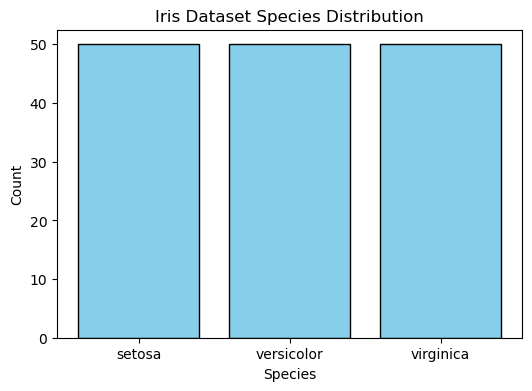

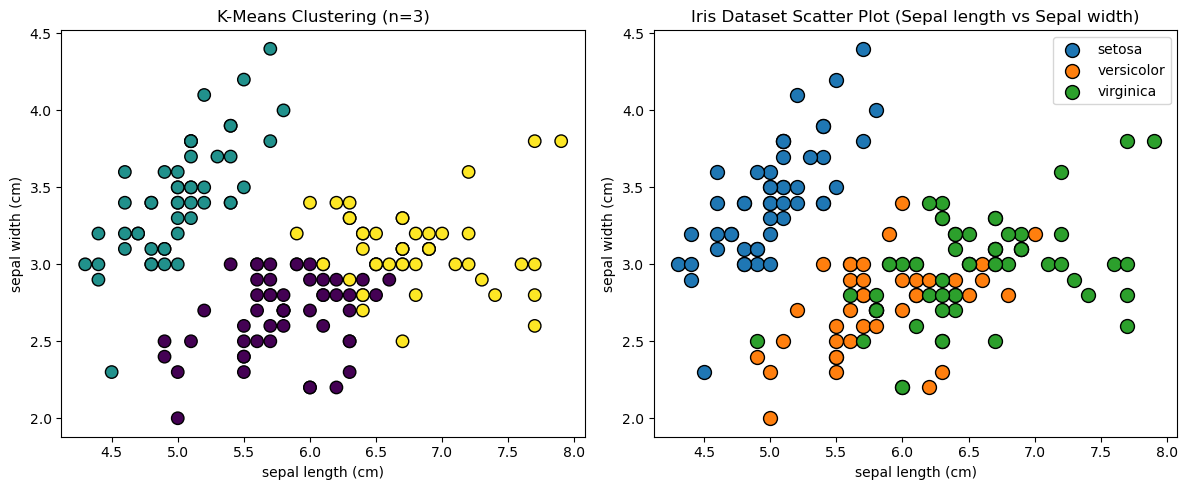

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load data
iris = load_iris(as_frame=True)
df = iris.frame.copy()
X = df.drop(columns=['target'])
y = df['target']
feature_names = iris.feature_names

# Get species names and counts
species_names = iris.target_names
species_counts = np.bincount(y)

# Bar plot
plt.figure(figsize=(6, 4))
plt.bar(species_names, species_counts, color='skyblue', edgecolor='black')
plt.xlabel("Species")
plt.ylabel("Count")
plt.title("Iris Dataset Species Distribution")
plt.show()


# Plot K-Means Clusters
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap='viridis', s=80, edgecolor='k')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('K-Means Clustering (n=3)')

plt.subplot(1, 2, 2)
for label in range(len(iris.target_names)):
    plt.scatter(
        X.loc[y == label, feature_names[0]],
        X.loc[y == label, feature_names[1]],
        label=iris.target_names[label],
        s=100,
        edgecolor='k'
    )
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Iris Dataset Scatter Plot (Sepal length vs Sepal width)')
plt.legend()
plt.tight_layout()
plt.show()

# Step-by-Step Breakdown of `Kmeans_iris.ipynb`

### Cell 1
```python
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd

# Load the iris dataset
iris = load_iris(as_frame=True)
print(iris.keys())  # Show the keys
```
**Description:**
- Imports libraries and loads the Iris dataset as a Pandas DataFrame.
- Prints dataset keys.


### Cell 2
```python
# Convert to DataFrame
df = iris.frame.copy()
```
**Description:**
- Copies the Iris dataset into a new DataFrame `df`.


### Cell 3
```python
df.head()
```
**Description:**
- Displays the first 5 rows of the DataFrame.


### Cell 4
```python
# Drop the target column
df = df.drop(columns=['target'])

from sklearn.preprocessing import StandardScaler
# Optional: Scale the features for better K-Means performance
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)
df.head()
```
**Description:**
- Drops the `target` column to keep only features.
- Scales features using StandardScaler.
- Displays the first 5 rows of the scaled DataFrame.


### Cell 5
```python
print(scaled_features[:5])
```
**Description:**
- Prints the first 5 rows of scaled features.


### Cell 6
```python
# Apply K-Means with n=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(scaled_features)
(df.head())
```
**Description:**
- Creates and fits a K-Means model with 3 clusters.
- Predicts cluster assignments and adds them to the DataFrame.
- Displays the first 5 rows with cluster labels.


### Cell 7
```python
# Visualize clusters
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['cluster'], cmap='viridis', edgecolor='k', s=100)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('K-Means Clustering of Iris Data (n=3)')
plt.show()
```
**Description:**
- Visualizes clusters in a scatter plot using the first two features.


### Cell 8
```python
# Get user input
print("Enter the flower measurements:")
sepal_length = float(input("Sepal length (cm): "))
sepal_width = float(input("Sepal width (cm): "))
petal_length = float(input("Petal length (cm): "))
petal_width = float(input("Petal width (cm): "))

# Prepare input for prediction
user_data = [[sepal_length, sepal_width, petal_length, petal_width]]

# Scale user input the same way as training data
user_data_scaled = scaler.transform(user_data)

# Predict cluster
cluster = kmeans.predict(user_data_scaled)[0]

print(f"The predicted cluster for the given flower is: {cluster}")
```
**Description:**
- Prompts the user to input flower measurements.
- Scales input data.
- Predicts and prints the cluster label.


### Cell 9
```python
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load data
iris = load_iris(as_frame=True)
df = iris.frame.copy()
X = df.drop(columns=['target'])
y = df['target']
feature_names = iris.feature_names

# Get species names and counts
species_names = iris.target_names
species_counts = np.bincount(y)

# Bar plot
plt.figure(figsize=(6, 4))
plt.bar(species_names, species_counts, color='skyblue', edgecolor='black')
plt.xlabel("Species")
plt.ylabel("Count")
plt.title("Iris Dataset Species Distribution")
plt.show()


# Plot K-Means Clusters
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap='viridis', s=80, edgecolor='k')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('K-Means Clustering (n=3)')

plt.subplot(1, 2, 2)
for label in range(len(iris.target_names)):
    plt.scatter(
        X.loc[y == label, feature_names[0]],
        X.loc[y == label, feature_names[1]],
        label=iris.target_names[label],
        s=100,
        edgecolor='k'
    )
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Iris Dataset Scatter Plot (Sepal length vs Sepal width)')
plt.legend()
plt.tight_layout()
plt.show()
```
**Description:**
- Reloads the Iris dataset.
- Creates a bar chart of species counts.
- Plots K-Means clusters and actual species distribution scatter plot.